In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

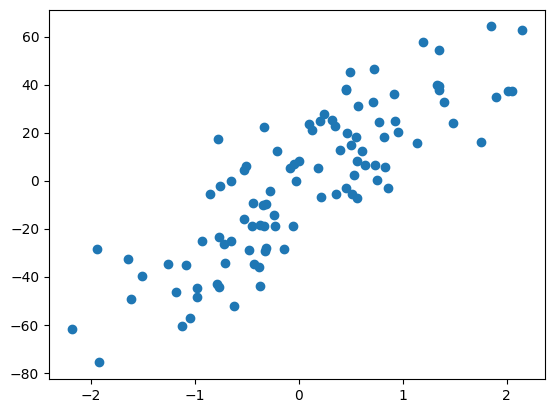

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

I'm using ordinary least square method to find correct m and b value to comparision GD m & b values.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [8]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [9]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope,self.b)
        print(self.b)
    

In [10]:
gd = GDRegressor(0.01,10)

In [11]:
gd.fit(X,y)

-22697.976504888527 106.97976504888527
22697.976504888524 -119.99999999999997
-22697.97650488852 106.97976504888524
22697.976504888517 -119.99999999999991
-22697.976504888513 106.97976504888521
22697.976504888517 -119.99999999999994
-22697.976504888513 106.97976504888518
22697.97650488851 -119.99999999999991
-22697.976504888513 106.97976504888521
22697.976504888517 -119.99999999999994
-119.99999999999994


#### Because of high learning rate, gradient is jumping zig zag on the loss function curve.

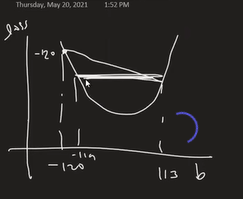

### The solution of this problem is lower learning rate and increase epochs

In [29]:
gd = GDRegressor(0.001,200)

In [30]:
gd.fit(X,y)

-22697.976504888527 -97.30202349511147
-18158.38120391082 -79.14364229120065
-14526.704963128655 -64.616937328072
-11621.363970502924 -52.99557335756907
-9297.091176402339 -43.69848218116673
-7437.672941121872 -36.26080924004486
-5950.138352897496 -30.31067088714736
-4760.110682317998 -25.550560204829363
-3808.0885458543985 -21.742471658974964
-3046.4708366835184 -18.696000822291445
-2437.1766693468144 -16.25882415294463
-1949.7413354774524 -14.309082817467178
-1559.7930683819616 -12.749289749085216
-1247.8344547055692 -11.501455294379646
-998.2675637644552 -10.50318773061519
-798.6140510115642 -9.704573679603627
-638.8912408092514 -9.065682438794376
-511.1129926474012 -8.554569446146974
-408.8903941179209 -8.145679052029054
-327.112315294337 -7.818566736734717
-261.68985223546974 -7.556876884499248
-209.35188178837493 -7.347525002710873
-167.48150543070045 -7.180043497280173
-133.9852043445602 -7.046058292935613
-107.18816347564808 -6.938870129459965
-85.75053078051916 -6.853119598679

### 4 important visualization

1) b vs m (gd regressor)
2) cost vs b (Because of learning rate initial jump is higher but as we approach convergence jump will lower)
3) loss function vs b (when curve become flat then we have to stop further iterations)
4) b vs epoch (After sometime updates in value of b will not be very large. it become stable)

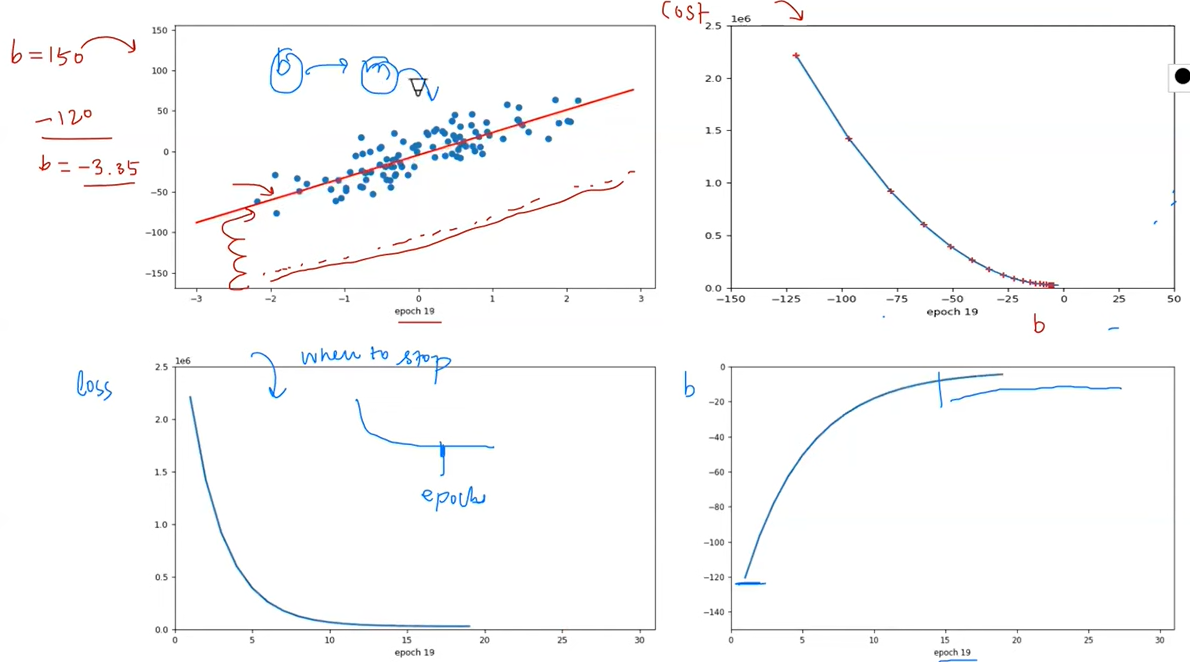

### Effect of learning rate 

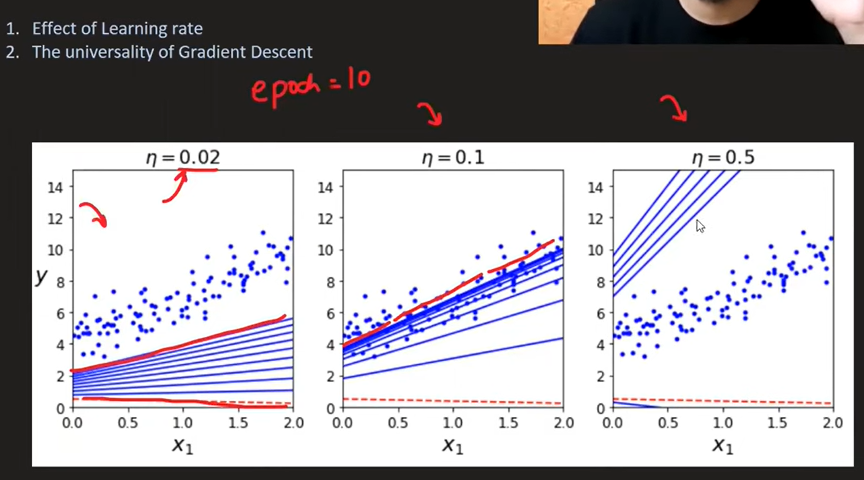

### Universality of gradient descent

Every ML algorithm has its own loss function. 

If the graph of loss function is differentiable then using GD we can find the optimal value.

Slope can be calculated for any differentiable loss function. So, GD is used with linear , logistics, DL algorithms and more.

### Both m and b (3-d loss function)

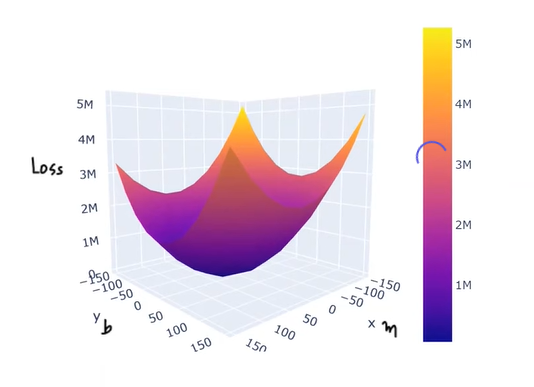

In [31]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [37]:
gd = GDRegressor(0.001,100)

In [38]:
gd.fit(X_train,y_train)

28.12598618006269 -2.2710234077993587


In [39]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.634515826773629

### Effect of learning rate 

https://developers.google.com/machine-learning/crash-course/linear-regression/gradient-descent

1) Low learning rate 

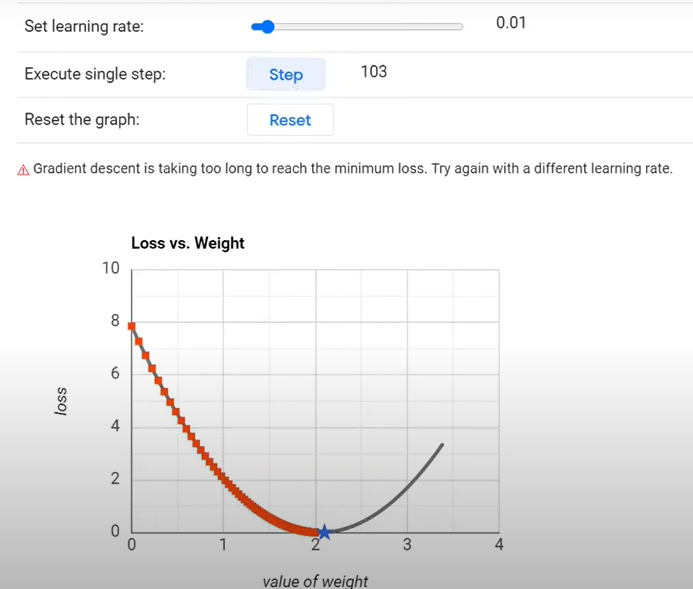

2) Normal Learning rate

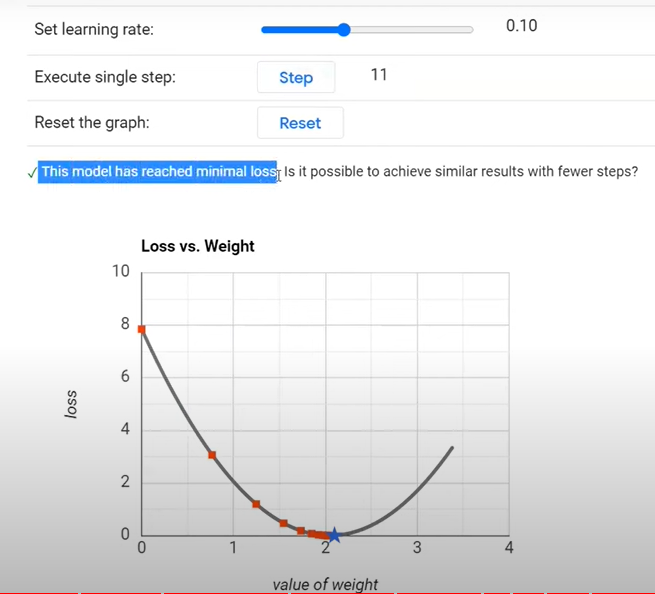

3) Very High learning rate 
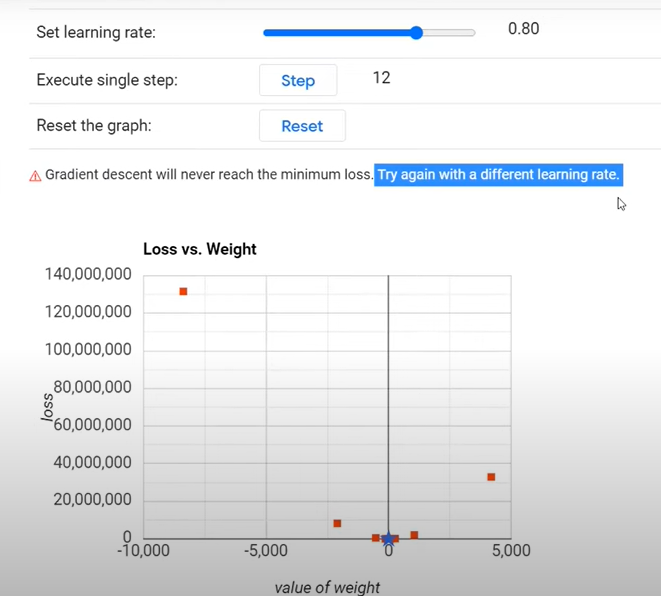

### Effect of loss function

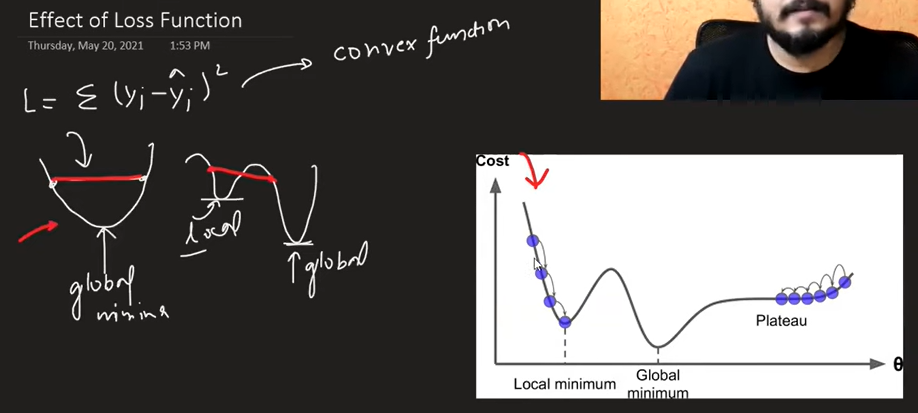

- Convex function (if we draw a line connecting two points on graph, function will never cross that line). It has only one global minima.

- Non Convex function (if we draw a line connecting two points on graph, function will cross that line). It has multiple local minima and global minima.

There is a high chance that we will stuck in local minima in a non convex function.

There may be saddle or plateau in our non convex function then it will take large no of epoch to find the convergence otherwise it will never reach the correct point.

### Effect of data 

If columns of our data are on a equal scale then its contour plot will look more circular and it can fastly converse to the minimum point otherwise plot will be like oval and it will take more time.

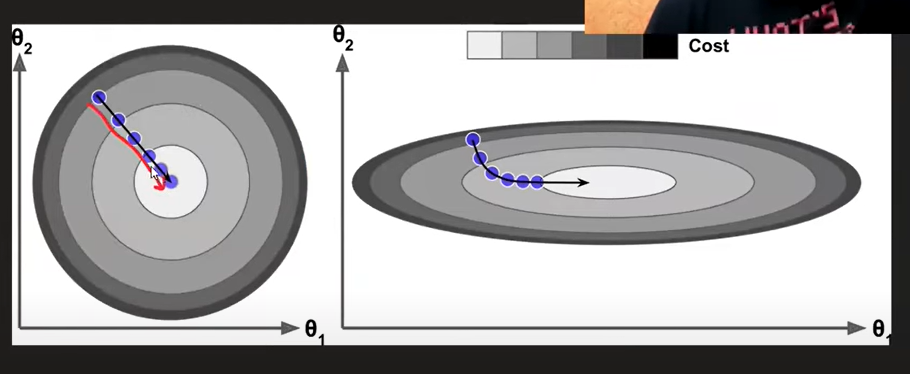